# EDA and Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Apartments-Dataset/apartments_pl_2023_09.csv')

first few rows

In [ ]:
df.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,...,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.0,NaN,1.0,NaN,53.364400,14.660900,...,0.399,condominium,brick,NaN,yes,no,no,no,no,350000
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.0,1.0,2.0,2013.0,53.480364,14.541494,...,0.183,condominium,brick,premium,yes,yes,no,yes,yes,607000
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000


data types of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16997 entries, 0 to 16996
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16997 non-null  object 
 1   city                  16997 non-null  object 
 2   type                  13171 non-null  object 
 3   squareMeters          16997 non-null  float64
 4   rooms                 16997 non-null  float64
 5   floor                 13954 non-null  float64
 6   floorCount            16751 non-null  float64
 7   buildYear             14048 non-null  float64
 8   latitude              16997 non-null  float64
 9   longitude             16997 non-null  float64
 10  centreDistance        16997 non-null  float64
 11  poiCount              16997 non-null  float64
 12  schoolDistance        16982 non-null  float64
 13  clinicDistance        16918 non-null  float64
 14  postOfficeDistance    16974 non-null  float64
 15  kindergartenDistanc

unique values and count of it

In [ ]:
for values in df.columns:
    print(df[values].unique())
    print(df[values].nunique())

['71de9eb8a92ac12d7c94315228b70cfb' '23d558163bb1c7863c73485048e50858'
 '3b8819c6c9ffd55adfddfd5bafcc844d' ... 'd971c4ed3aab9919bf203e96019a678e'
 'cd0241b70b79aaaf767a0dd3a7cfbb31' '1cdf62d567c6be2fa488f16ad9939c3a']
16997
['szczecin' 'gdynia' 'krakow' 'poznan' 'bialystok' 'gdansk' 'wroclaw'
 'radom' 'rzeszow' 'lodz' 'katowice' 'lublin' 'czestochowa' 'warszawa'
 'bydgoszcz']
15
['tenement' nan 'blockOfFlats' 'apartmentBuilding']
3
[123.45  53.8   50.   ...  62.08  86.68 100.76]
4042
[4. 2. 3. 1. 5. 6.]
6
[ 2.  5. nan  1.  8.  4.  3.  6.  9. 10. 12.  7. 23. 11. 17. 13. 14. 16.
 15. 20. 24. 18. 29. 19.]
23
[ 3.  5.  1.  2.  4. 12. 10. 11.  7.  9.  8.  6. nan 23. 26. 16. 17. 13.
 14. 15. 18. 20. 19. 24. 25. 29. 22. 28. 21. 27.]
29
[  nan 2013. 1920. 1980. 1970. 1930. 1945. 1940. 2012. 1985. 1990. 1900.
 1925. 2009. 2004. 2016. 2020. 2017. 1968. 1960. 2001. 2000. 2002. 1975.
 1935. 1986. 1993. 1957. 1910. 1972. 1971. 1938. 1976. 1932. 2010. 2019.
 1981. 2007. 1997. 1992. 2015. 2005. 1984.

duplicates

In [ ]:
duplicates=df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
16992    False
16993    False
16994    False
16995    False
16996    False
Length: 16997, dtype: bool


mean median std

In [ ]:
numerical_columns=df.select_dtypes(include=[np.number]).columns
for values in numerical_columns:
    print(np.mean(df[values]))
    print(np.median(df[values]))
    print(np.std(df[values]))

59.033911866800025
55.19
21.3621149956305
2.6893569453432957
3.0
0.9160761032377895
3.3275763222015193
nan
2.532059715581194
5.237538057429407
nan
3.305544048955238
1984.3519362186787
nan
34.03998430608598
52.066226536724315
52.1975689
1.3312292419705622
19.528679804126135
19.903611
1.790035462750575
4.347107724892628
3.93
2.8934983163401715
20.345590398305582
13.0
23.709385591185736
0.41871246025203157
nan
0.48260385762119123
0.9881392008511642
nan
0.9109991065955428
0.5242993990809472
nan
0.5163967169243565
0.37886439380557024
nan
0.4674147480615769
0.3592996343045889
nan
0.4878901183648588
1.451508578357078
nan
1.109541906257763
0.3703330387651702
nan
0.48304607108910813
708097.2219803495
639000.0
351978.4498838635


missing values count

In [ ]:
print(df.isnull().sum())

id                          0
city                        0
type                     3826
squareMeters                0
rooms                       0
floor                    3043
floorCount                246
buildYear                2949
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             15
clinicDistance             79
postOfficeDistance         23
kindergartenDistance       14
restaurantDistance         43
collegeDistance           502
pharmacyDistance           23
ownership                   0
buildingMaterial         6635
condition               12958
hasParkingSpace             0
hasBalcony                  0
hasElevator               868
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64


mean median imputation

In [ ]:
df_mean=df[numerical_columns].fillna(df[numerical_columns].mean())
df_median=df[numerical_columns].fillna(df[numerical_columns].median())
print(df_mean.head(5))
print(df_median.head(5))

   squareMeters  rooms     floor  floorCount    buildYear   latitude  \
0        123.45    4.0  2.000000         3.0  1984.351936  53.432586   
1         53.80    2.0  5.000000         5.0  1984.351936  53.429429   
2         50.00    2.0  3.327576         1.0  1984.351936  53.364400   
3         55.19    2.0  1.000000         2.0  2013.000000  53.480364   
4         73.02    3.0  2.000000         3.0  1984.351936  53.452222   

   longitude  centreDistance  poiCount  schoolDistance  clinicDistance  \
0  14.535685            1.96      46.0           0.138           0.410   
1  14.554642            0.79      60.0           0.147           0.437   
2  14.660900            9.32       6.0           0.367           1.368   
3  14.541494            6.46       2.0           1.570           2.879   
4  14.553333            3.24       9.0           0.275           0.672   

   postOfficeDistance  kindergartenDistance  restaurantDistance  \
0               0.113                 0.367            

backward and forward fill

In [ ]:
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')

/tmp/ipython-input-3815726256.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-3815726256.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


In [ ]:
df_drop = df.drop_duplicates()
print(df_drop.head(3))

                                 id      city      type  squareMeters  rooms  \
0  71de9eb8a92ac12d7c94315228b70cfb  szczecin  tenement        123.45    4.0   
1  23d558163bb1c7863c73485048e50858  szczecin       NaN         53.80    2.0   
2  3b8819c6c9ffd55adfddfd5bafcc844d  szczecin  tenement         50.00    2.0   

   floor  floorCount  buildYear   latitude  longitude  ...  pharmacyDistance  \
0    2.0         3.0        NaN  53.432586  14.535685  ...             0.321   
1    5.0         5.0        NaN  53.429429  14.554642  ...             0.073   
2    NaN         1.0        NaN  53.364400  14.660900  ...             0.399   

     ownership  buildingMaterial  condition  hasParkingSpace  hasBalcony  \
0  condominium             brick        NaN               no         yes   
1  cooperative               NaN        NaN               no          no   
2  condominium             brick        NaN              yes          no   

   hasElevator  hasSecurity  hasStorageRoom   price  

histogram

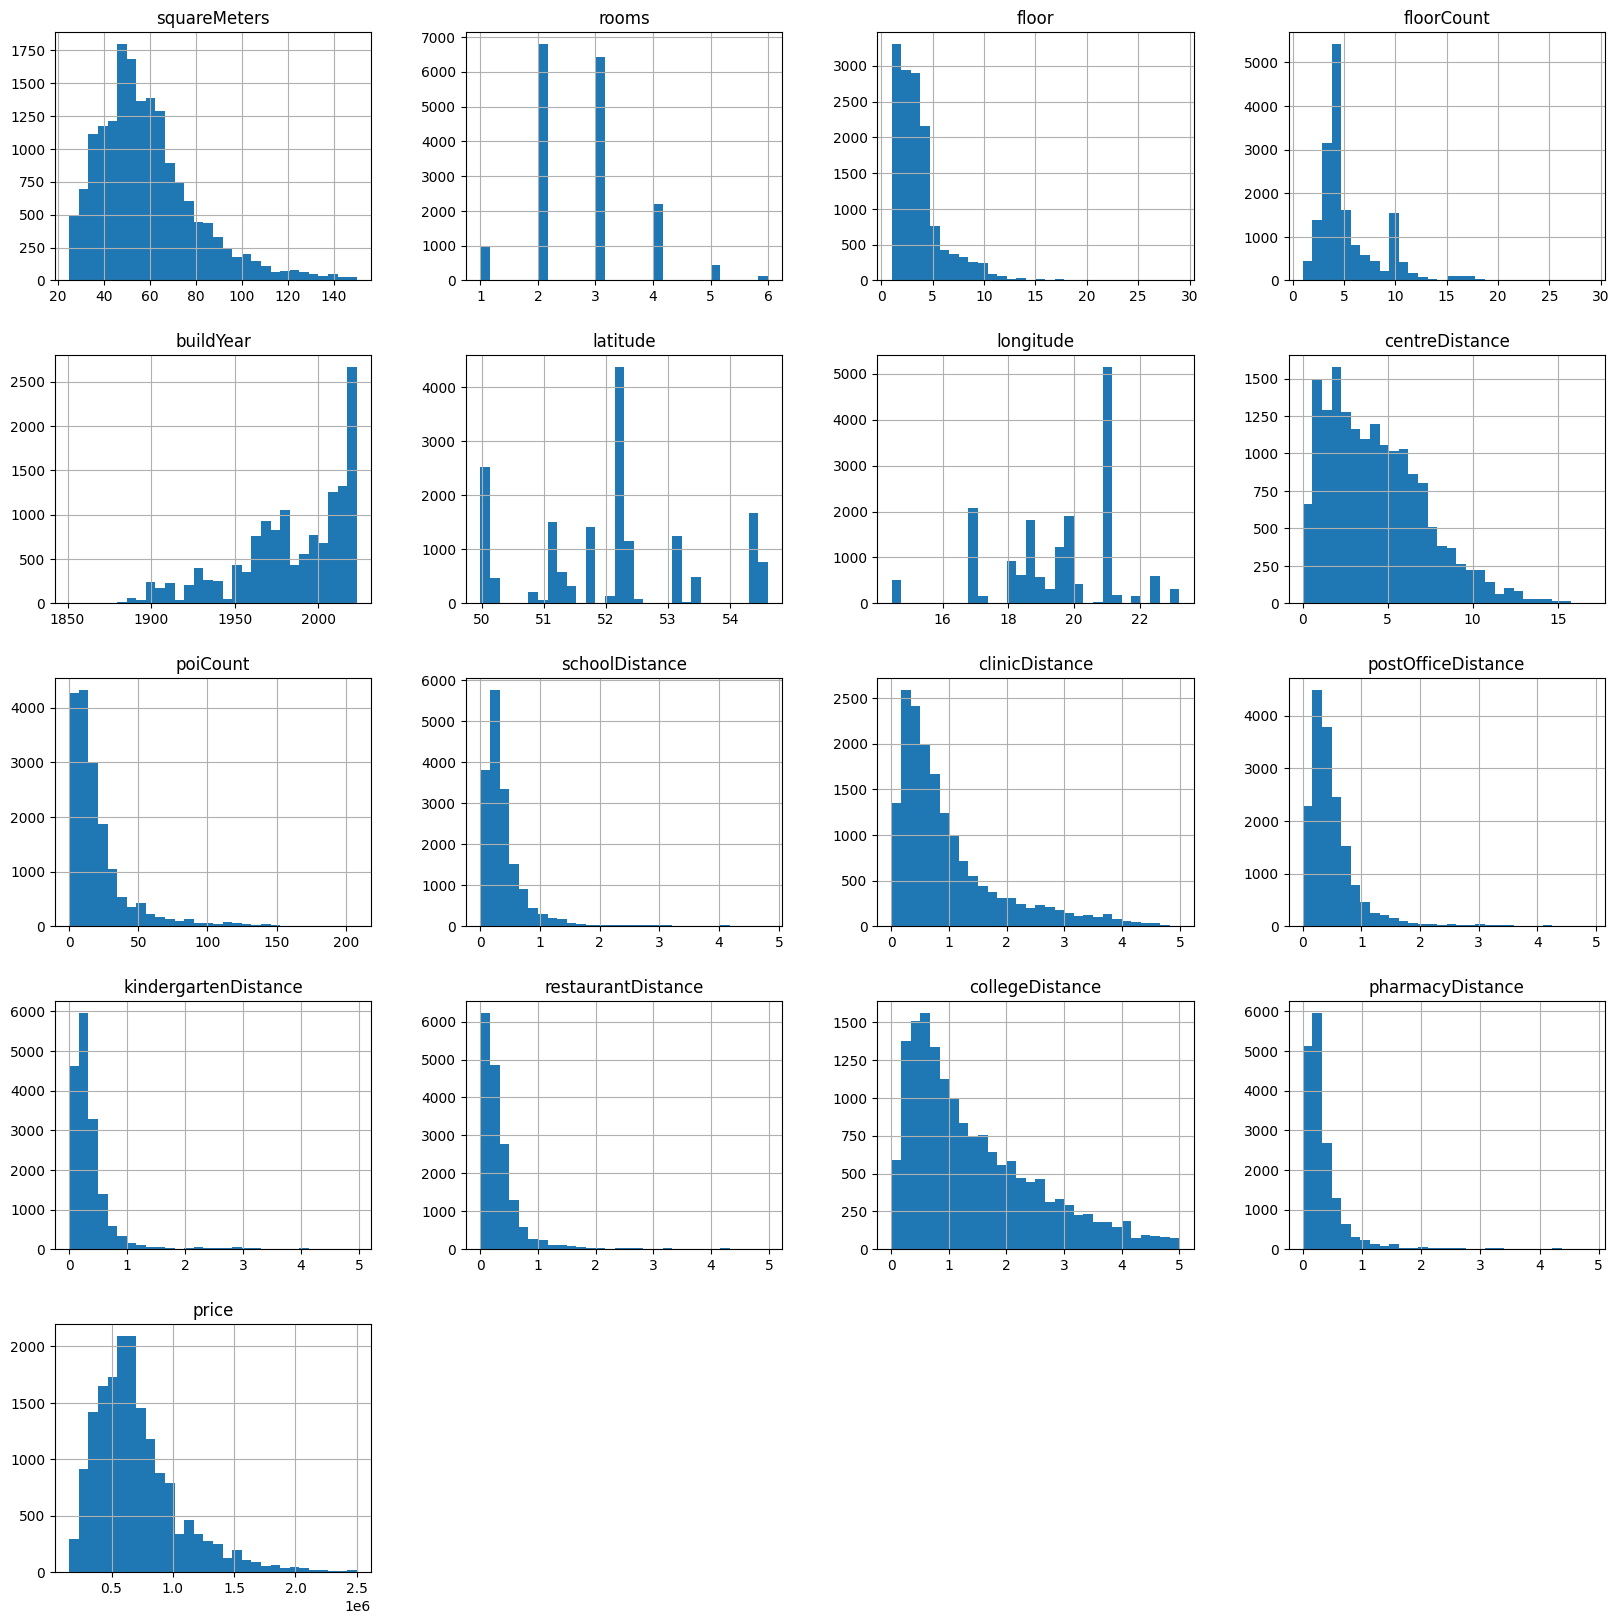

In [ ]:
df[numerical_columns].hist(figsize=(20,20),bins=30)
plt.show()

box plots

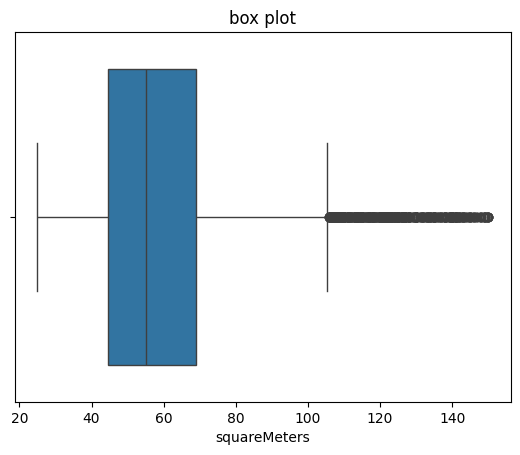

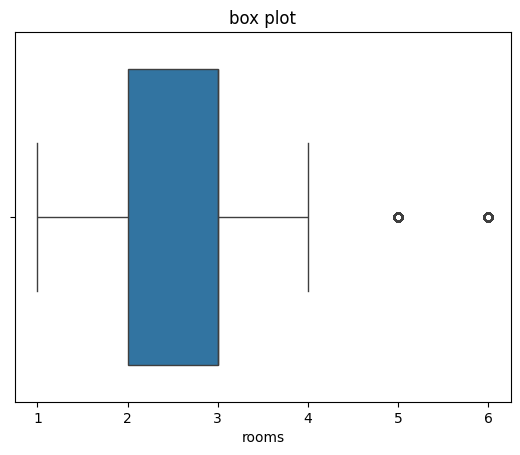

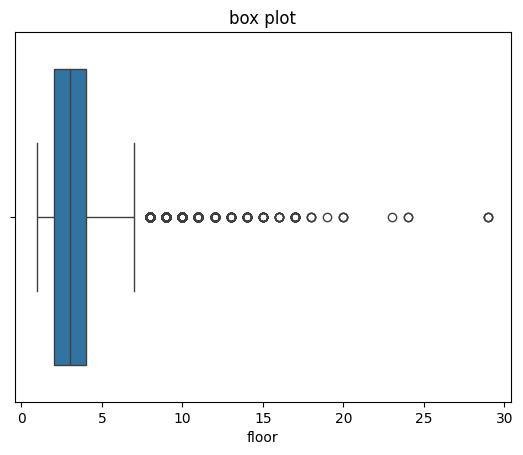

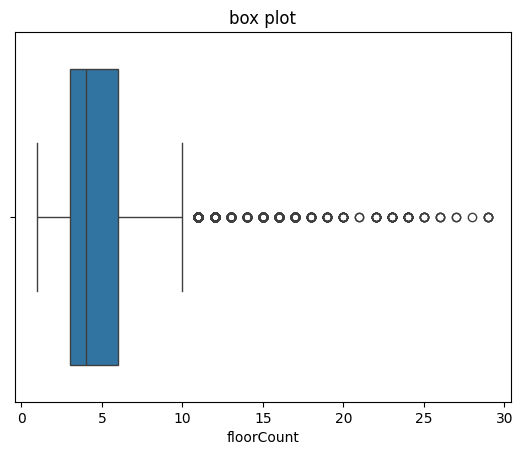

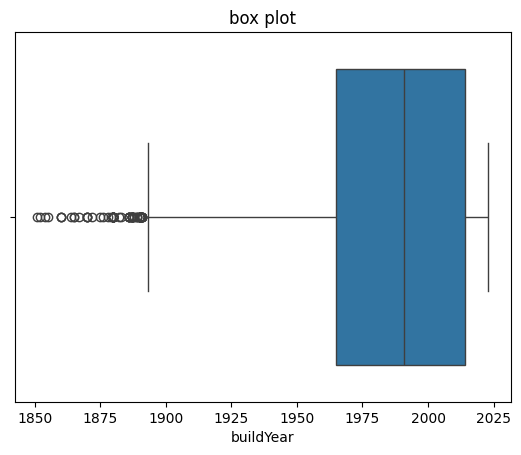

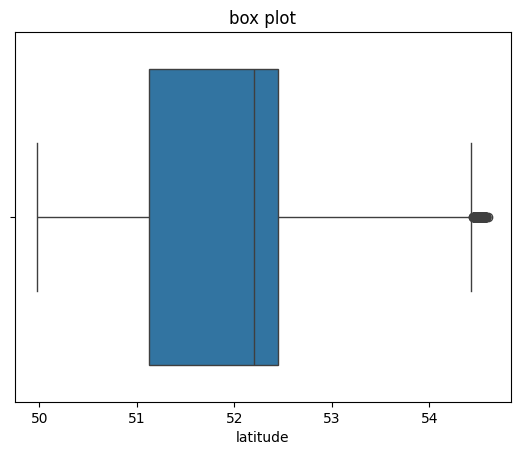

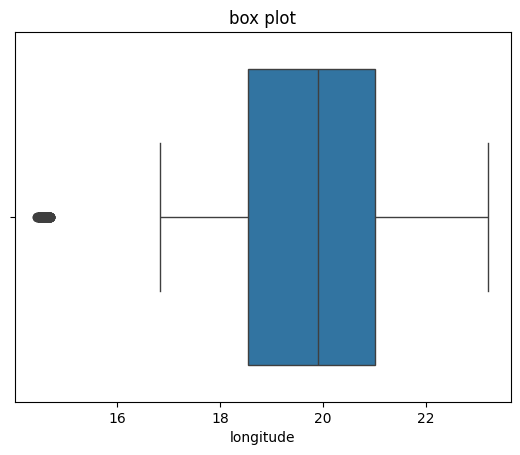

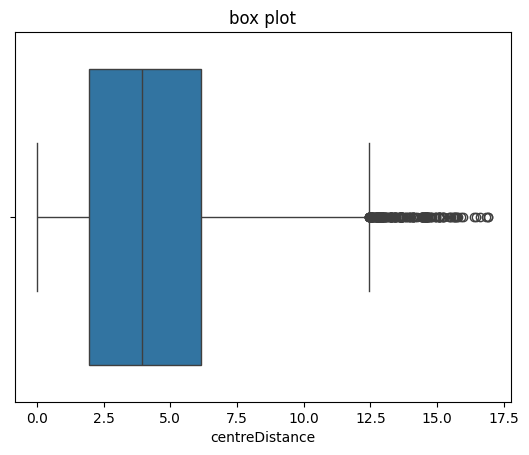

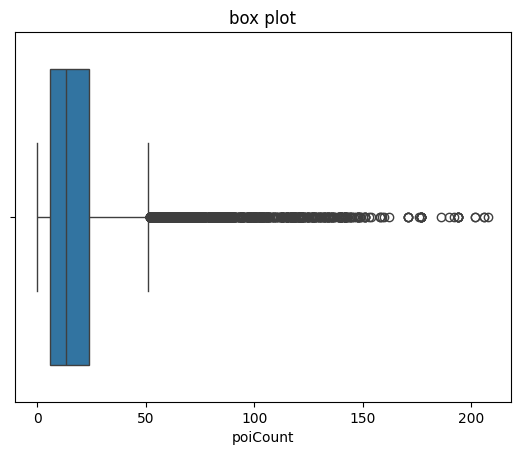

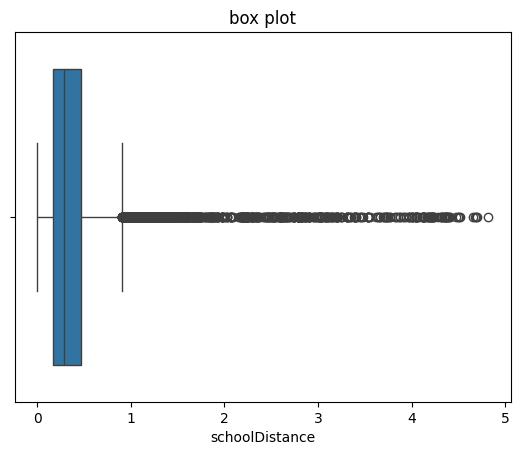

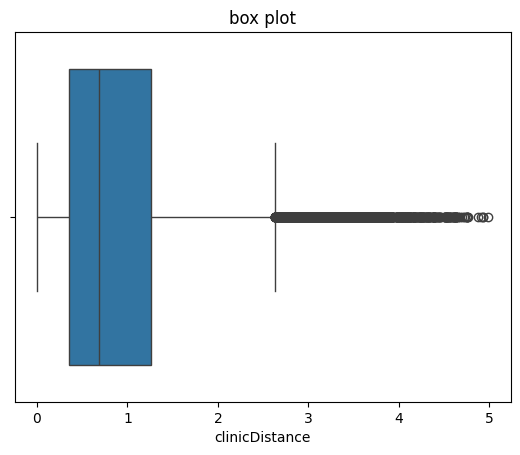

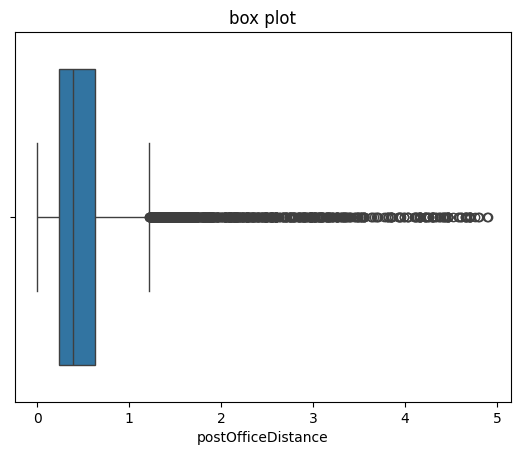

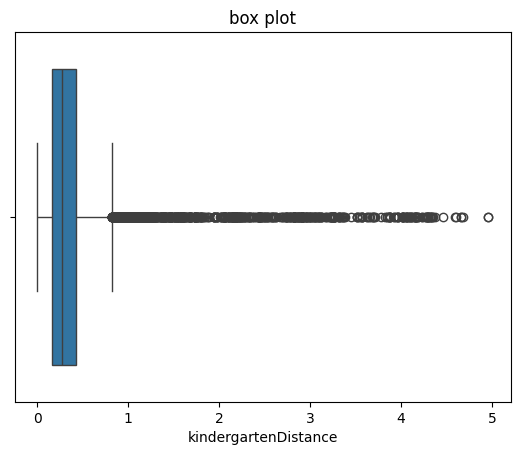

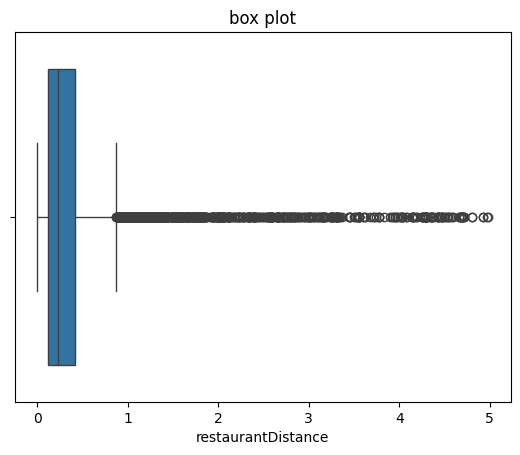

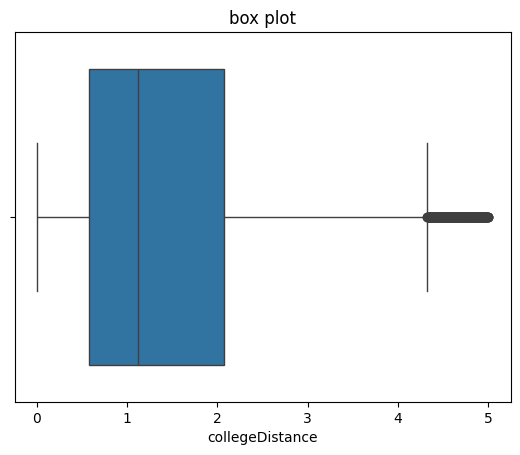

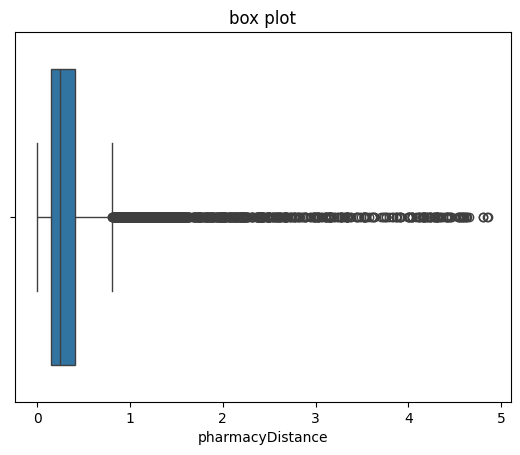

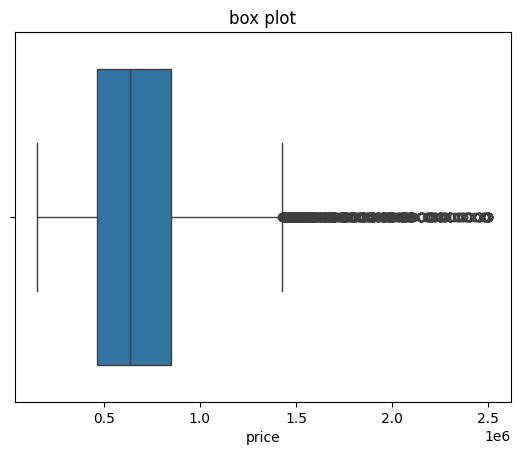

In [ ]:
for values in numerical_columns:
    sns.boxplot(x=df[values])
    plt.title("box plot")
    plt.show()

distribution of price

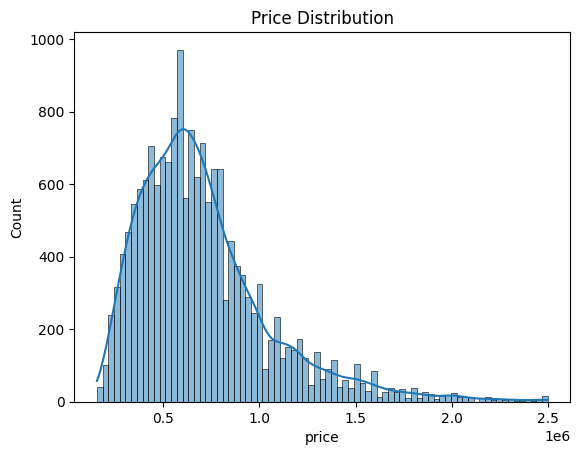

In [ ]:
if "price" in df.columns:
    sns.histplot(df["price"], kde=True)
    plt.title("Price Distribution")
    plt.show()

categorical feature distribution